In [1]:
! pip install numpy pandas seaborn matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 504.9 kB/s  0:00:31 eta 0:00:010:02:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 677.3 kB/s  0:00:17a 0:00:010:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 651.9 kB/s  0:00:13 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 575.1 kB/s  0:00:16 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 751.9 kB/s  0:00:062.0 kB/s eta 0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 745.5 kB/s  0:00:02764.4 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.1 MB/s  0:00:05a 0:00:010:00:01:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 637.6 kB/s  0:00:46 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [seaborn]5;237m━━ 15/16 [seaborn]earn]


In [100]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  PolynomialFeatures
import joblib

In [5]:
# 1. Load the dataset into a Pandas DataFrame & display the first 5 rows.
df = pd.read_csv(r'cardekho.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [7]:
#2. Check for missing values in the dataset.
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [9]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [10]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [14]:
#to turn max power column from object to float
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# to turn seats column from float to integer
df['seats'] = df['seats'].astype('Int64')


In [15]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                   Int64
dtype: object

In [16]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.0
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.0
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.0
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.0
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.0
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.0


In [17]:
# to replace missing values in the columns with mean
df['engine'] = df['engine'].fillna(df['engine'].mean())
df['max_power'] = df['max_power'].fillna(df['max_power'].mean())

#to replace missing values in seats with mode
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

#4. Fill missing values in the “mileage” column with the column’s mean.
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())

df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [63]:
#3. Drop any rows where the target variable (selling price) is missing.


Explain why filling missing values can sometimes be better than dropping rows.

In [18]:
#5. Remove duplicate rows from the dataset.

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


1202
0


Explain how duplicate rows can affect model training.

In [19]:
#6. # Convert the “year” column into the car’s age.
# Get current year
current_year = datetime.now().year

# Create "car_age" column
df['car_age'] = current_year - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,18


In [20]:
#7. Check the unique values in the “fuel type” column.
print(df["fuel"].nunique())
print(df["fuel"].unique())

4
['Diesel' 'Petrol' 'LPG' 'CNG']


In [21]:
#8. Replace inconsistent values in the “transmission” column.
df['transmission'] = df['transmission'].str.lower().str.strip()
df['transmission'] = df['transmission'].replace({
    'manual': 'Manual',
    'automatic': 'Automatic'
})

df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,18


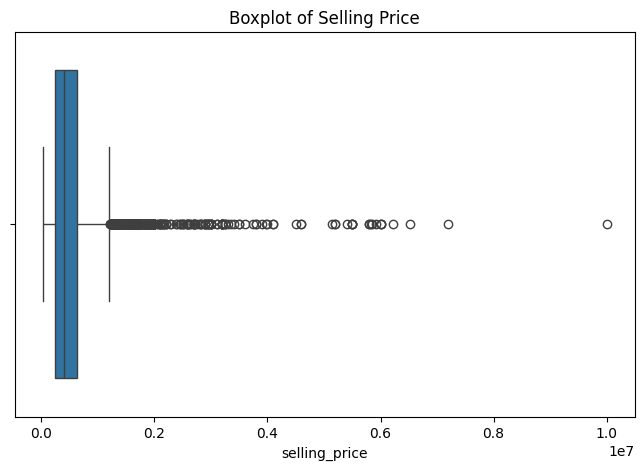

In [22]:
#9. Check if there are any outliers in the “selling price” column using a boxplot.
# Create a boxplot for the "price" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["selling_price"])
plt.title("Boxplot of Selling Price")
plt.xlabel("selling_price")
plt.show()

In [23]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,car_age
count,6926.000000,6.926000e+03,6.926000e+03,6926.000000,6926.000000,6926.000000,6926.0,6926.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.463912,1431.724228,87.839675,5.4216,11.579700
std,4.078286,5.197670e+05,5.835810e+04,3.987884,486.048519,31.302118,0.972171,4.078286
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.0,5.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.950000,1197.000000,68.000000,5.0,8.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.418783,1248.000000,81.860000,5.0,11.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.0,14.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.0,42.000000


In [24]:
#10. # Remove cars priced below 10,000 or above 5,000,000
df= df[(df["selling_price"] >= 10000) & (df["selling_price"] <= 5000000)]

#Verify no values are outside the desired range
print(df["selling_price"].describe())

count    6.906000e+03
mean     5.013782e+05
std      4.247149e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.300000e+05
max      4.600000e+06
Name: selling_price, dtype: float64


In [25]:
#11. Standardize the column names
# so they are all lowercase and contain underscores instead of spaces.

# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Check the updated column names
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,18


In [26]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                   Int64
car_age                 int64
dtype: object

In [27]:
#to change mileage title
df= df.rename(columns={'mileage(km/ltr/kg)':'mileage'})

In [28]:
#13. Create a new column for “price per kilometer” by dividing the selling price by the mileage.
#to create a new column
df["price_per_km"]= df['selling_price']/df['mileage'].round(2)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,price_per_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,18,8074.534161


In [29]:
df = df.reset_index(drop=True)

In [30]:
print(df.index)

RangeIndex(start=0, stop=6906, step=1)


In [31]:
df.to_csv("cleaned_cardekho.csv",index = False)

In [32]:
## 16. Find the average selling price of cars in the dataset.
avg_selling_price = df['selling_price'].mean().round(2)
print(avg_selling_price)


501378.18


In [33]:
## Find the most common fuel type in the dataset.
most_common_fuel = df['fuel'].value_counts().idxmax()
print(most_common_fuel)

Diesel


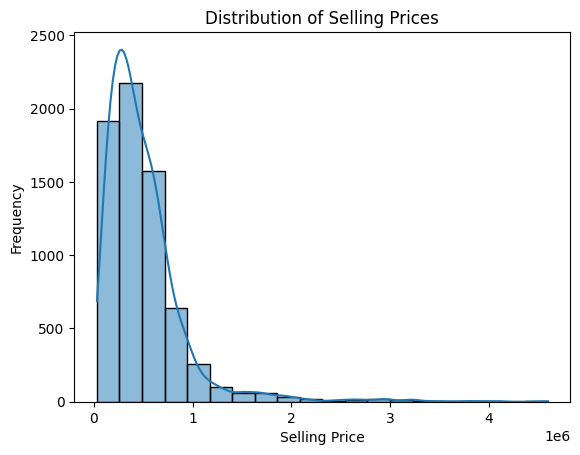

In [34]:
## Plot a histogram of the selling prices
sns.histplot(df['selling_price'], bins=20,kde=True, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

In [35]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,price_per_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,18,8074.534161


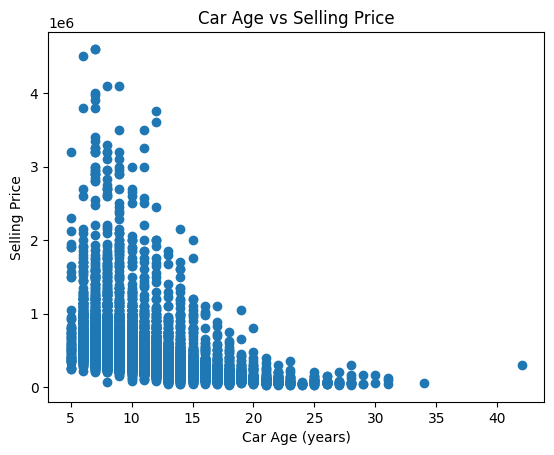

In [36]:
## Plot the relationship between car age and selling price using a scatter plot.
plt.scatter(df['car_age'], df['selling_price'])
plt.xlabel("Car Age (years)")
plt.ylabel("Selling Price")
plt.title("Car Age vs Selling Price")
plt.show()

In [37]:
## Group cars by fuel type and find the average selling price for each group.
avg_price_by_fuel = df.groupby('fuel')['selling_price'].mean()

print(avg_price_by_fuel)

fuel
CNG       300499.946429
Diesel    620448.482224
LPG       200421.052632
Petrol    363717.339629
Name: selling_price, dtype: float64


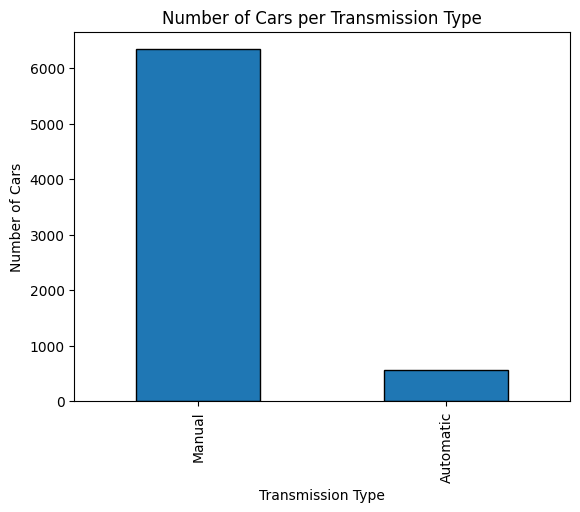

In [38]:
##  Plot a bar chart showing the number of cars per transmission type.
transmission_counts = df['transmission'].value_counts()

transmission_counts.plot(kind='bar',edgecolor ='black')
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.title("Number of Cars per Transmission Type")
plt.show()

In [39]:
##  Find the car with the highest mileage in the dataset.
highest_mileage_row = df.loc[df['mileage'].idxmax()]
car_name = highest_mileage_row['name']
mileage = highest_mileage_row['mileage']
print(car_name)

Maruti Alto 800 CNG LXI Optional


In [40]:
##  Calculate the correlation between mileage and selling price.
correlation = df['mileage'].corr(df['selling_price'])
print(f"Correlation between mileage and selling price: {correlation}")

Correlation between mileage and selling price: -0.1206984927318877


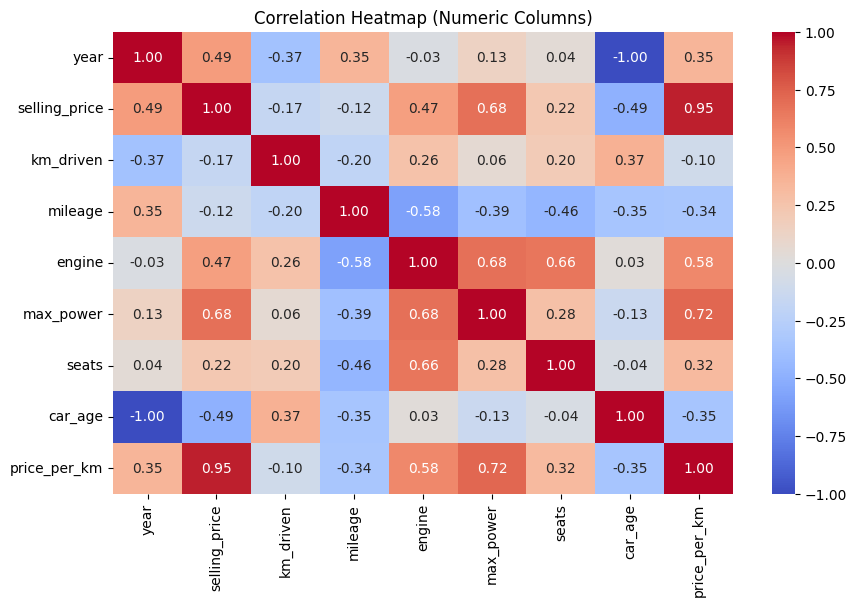

In [41]:
##  Plot a heatmap showing the correlations between all numeric columns.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

transmission
Automatic    1.143215e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


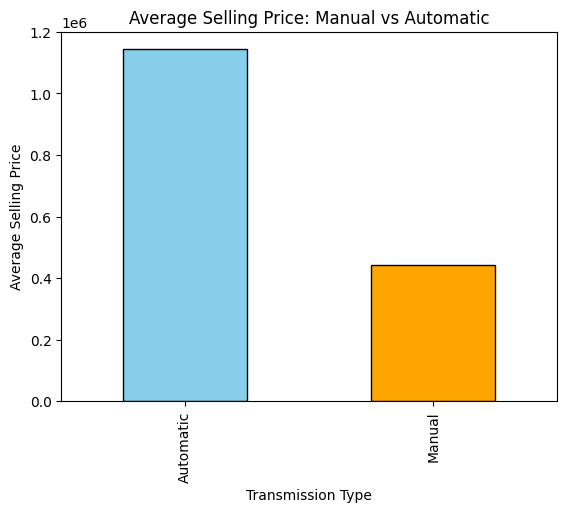

In [42]:
## Check if manual cars are generally cheaper or more expensive than automatic cars.
avg_price_by_transmission = df.groupby('transmission')['selling_price'].mean()

print(avg_price_by_transmission)
avg_price_by_transmission.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel("Transmission Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price: Manual vs Automatic")
plt.show()

In [43]:
##  Find the average selling price for each year of manufacture.
yearly_avg_price = df.groupby('year')['selling_price'].mean().round(2)
print(yearly_avg_price)

year
1983    300000.00
1991     55000.00
1994     88000.00
1995    107500.00
1996     81666.67
1997     90181.73
1998     73100.00
1999     71470.59
2000     90047.85
2001     47220.33
2002     99153.81
2003     97034.02
2004    109364.25
2005    137994.49
2006    164383.31
2007    174894.51
2008    208397.64
2009    227691.62
2010    273897.33
2011    318335.70
2012    351387.38
2013    451501.72
2014    511858.80
2015    589177.63
2016    653180.34
2017    708006.17
2018    825749.55
2019    795583.29
2020    786548.34
Name: selling_price, dtype: float64


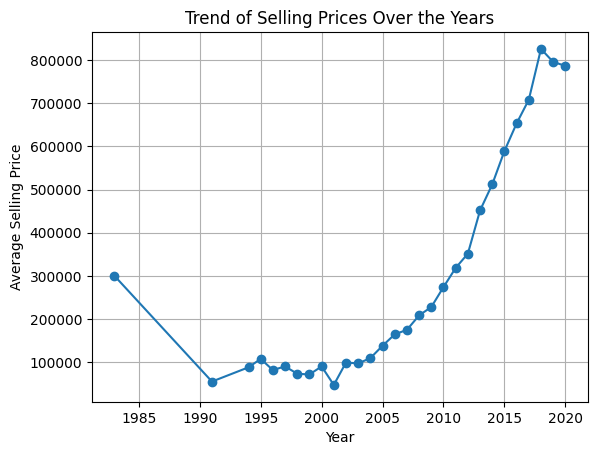

In [44]:
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.title("Trend of Selling Prices Over the Years")
plt.grid(True)
plt.show()

In [45]:
##  Find the most expensive car for each fuel type.
idx = df.groupby('fuel')['name'].idxmax()
most_expensive_cars = df.loc[idx, ['fuel', 'name', 'selling_price']]
print(most_expensive_cars)

        fuel                               name  selling_price
2513     CNG        Tata Indica V2 Emax CNG GLX         155000
142   Diesel             Volvo XC40 D4 R-Design        3400000
90       LPG        Maruti Wagon R LXI LPG BSIV         225000
5316  Petrol  Volkswagen Vento Petrol Trendline         227000


In [46]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,price_per_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,18,8074.534161


In [47]:
##  Find out which brand appears most frequently in the dataset.
df['brand'] = df['name'].str.split().str[0]
most_common_brand = df['brand'].value_counts().idxmax()
count = df['brand'].value_counts().max()
print(most_common_brand)
print(count)


Maruti
2165


In [48]:
## . Check the top 5 most common combinations of fuel type and transmission.
top_combinations = (
    df.groupby(['fuel', 'transmission'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
    .head(5)
)

print(top_combinations)

     fuel transmission  Count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    284
4  Petrol    Automatic    280
0     CNG       Manual     56


## Machine Learning
The main assumptions of linear regression include:
1. Linearity: A linear relationship exists between the independent and dependent variables.
2. Homoscedasticity(Equal Variance of Errors): The variance of the residuals(differences between actual and predicted selling prices) is constant across all values of the independent vaiables.
3. Independence of Errors(Residuals): Each error term(residual) is independent of the others.
4. Normality of Residuals: The residuals are normally distributed .
5. No multicollinearity: Independent variables are not highly correlated with each other.



In [49]:
# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill Nans
df = df.fillna(df.median(numeric_only=True))


In [103]:
# Encode categorical features + keep numerical ones
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
df_encoded = pd.get_dummies(df.drop(columns=['name', 'selling_price']),
                            columns=categorical_features,
                            drop_first=True).astype(int)
df_encoded

,year,km_driven,mileage,engine,max_power,seats,car_age,price_per_km,fuel_Diesel,fuel_LPG,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,145500,23,1248,74,5,11,19230,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,120000,21,1498,103,5,11,17502,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2006,140000,17,1497,78,5,19,8926,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,127000,23,1396,90,5,15,9782,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,120000,16,1298,88,5,18,8074,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,2013,50000,18,998,67,5,12,13756,0,0,...,0,0,0,0,0,0,0,0,0,0
6902,2014,80000,22,1396,88,5,11,21073,1,0,...,0,0,0,0,0,0,0,0,0,0
6903,2013,110000,18,1197,82,5,12,17297,0,0,...,0,0,0,0,0,0,0,0,0,0
6904,2007,119000,16,1493,110,5,18,8035,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
joblib.dump(df_encoded.columns, "trained_columns.pkl")
print("Saved column order for deployment.")

Saved column order for deployment.


In [105]:
# Features and target
X = df_encoded
y = df['selling_price']

In [106]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# train model(Linear Regression)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [108]:
# Coefficients and intercept
print("Intercept:", linear_reg.intercept_)
print("Coefficients:", linear_reg.coef_)

Intercept: -13509034.377627254
Coefficients: [ 6.78521836e+03 -1.41536673e-01  9.18858485e+03 -3.03339020e+01
  7.17836481e+02 -9.90732810e+03 -6.78521836e+03  1.24247706e+01
  1.09238227e+05  4.09298073e+04  2.98280360e+04 -1.69128355e+04
  3.93959563e+04  3.52373007e+03 -3.64199739e+03 -2.05630212e+04
  2.39398196e+05 -1.03833941e+04 -1.14912347e+05  7.83779288e+04
  3.79829007e+05 -1.50722977e+05 -1.73652004e+04 -1.52941749e+05
 -1.56302351e+05 -6.78526581e+04 -1.18197957e+05 -6.40388204e+04
 -9.25893938e+04 -1.74683252e+05  7.74979926e+04 -4.40038132e+04
  3.27950168e+04  2.78963246e+05 -1.13204035e+05 -1.05544596e+05
 -8.81571660e+04  9.47293040e+04 -1.34345319e+05 -1.15254622e+05
  7.16831346e+04 -4.65667287e+04 -1.36900276e+05 -9.30460682e+04
 -1.48372221e+05 -1.22942836e+05 -1.21834699e+05  1.56648023e+05]


In [109]:
# predictions
y_pred = linear_reg.predict(X_test)

# evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R^2 Score: 0.9458187178406827
Mean Squared Error: 9834544712.046762
Root Mean Squared Error: 99169.27302368794


### Model Evaluation

- **R² Score: 0.946**
  - This means the model explains about **94.6% of the variation** in car selling prices.
  - It indicates a very strong fit between the features and the target variable.

- **Mean Squared Error (MSE): 9.82 × 10⁹**
  - Represents the average squared difference between actual and predicted prices.
  - The value is large because it is in squared units, making it harder to interpret directly.

- **Root Mean Squared Error (RMSE): 99106
  - On average, the model’s predictions are off by about 99k compared to actual prices.
  - Considering the average car price is 500k this error is around 20% which is acceptable but shows there is still room for improvement.


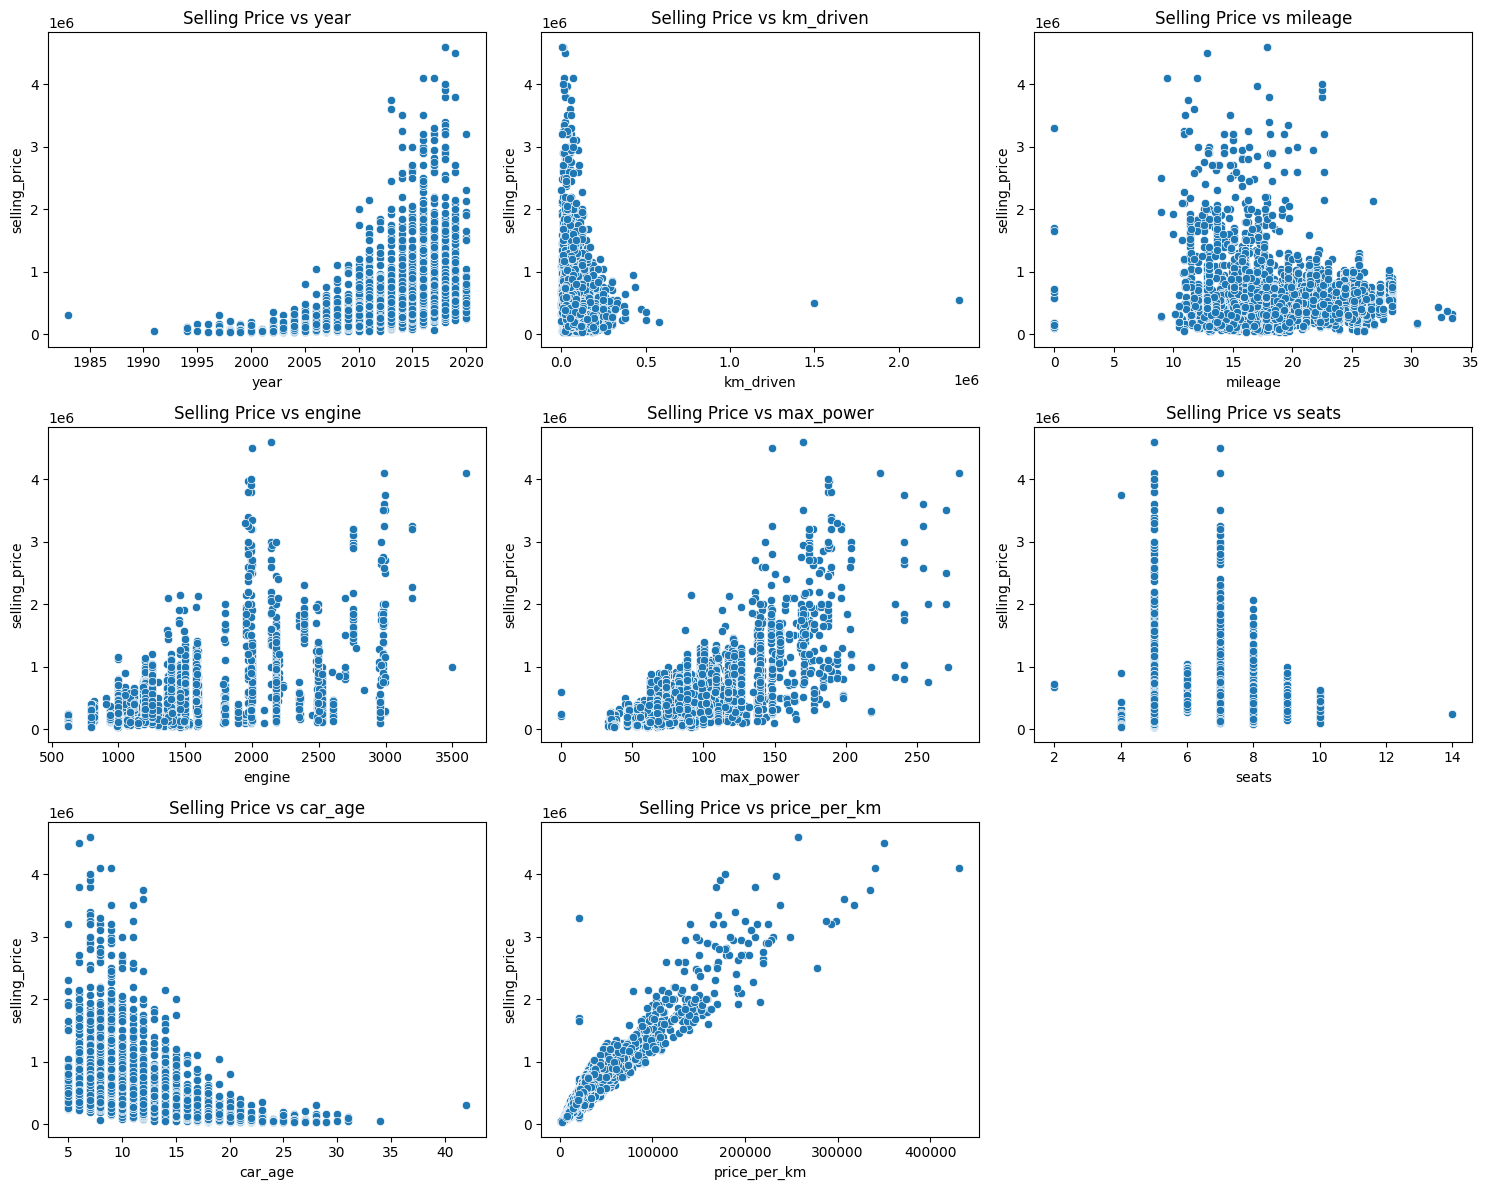

In [110]:
# What are the main assumptions of Linear Regression, and how can you check them using this dataset
# linearity

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('selling_price')

# 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x=feature, y='selling_price', ax=axes[i])
    axes[i].set_title(f'Selling Price vs {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


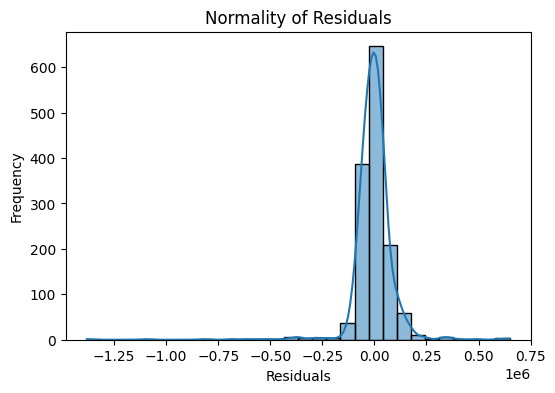

In [111]:
# Normality of Residuals
# Residuals
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

it's kind of bell-shaped so it's normal distribution.

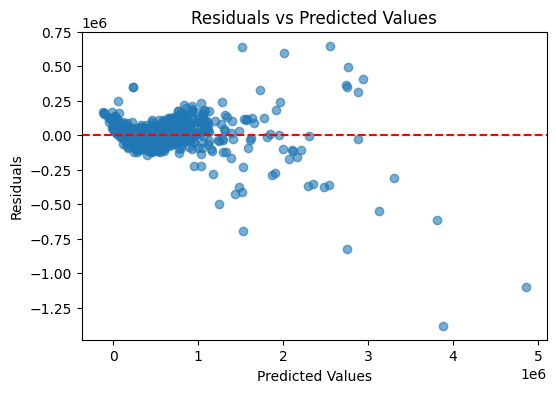

In [112]:
# Homoscedasticity
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [113]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso regression
lasso = Lasso(alpha=1.0, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,10000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [114]:
# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)

print("Lasso Regression R²:", lasso_r2)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression RMSE: ", lasso_rmse)

Lasso Regression R²: 0.9458228305552759
Lasso Regression MSE: 9833798205.616072
Lasso Regression RMSE:  99165.50915321351


In [126]:
# Train Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [127]:
# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse)

print("Ridge Regression R^2:", r2_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression RMSE: ", rmse_ridge)

Ridge Regression R^2: 0.9463350861055967
Ridge Regression MSE: 9740817753.458992
Ridge Regression RMSE:  99169.27302368794


In [117]:
# cross validation for ridge regression
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')  # 5-fold CV

print("Cross-Validation R^2 scores: ", scores)
print("Mean R^2: ", scores.mean())


Cross-Validation R^2 scores:  [0.94749277 0.94259101 0.95657279 0.95185919 0.92170822]
Mean R^2:  0.9440447958916082


## Summary
Ridge Regression performed slightly better than both Linear and Lasso Regression in terms of R². The improvement is not dramatic, but Ridge was more stable across cross-validation folds, which indicates better generalization. This makes sense because Ridge tends to perform well when there are many correlated features, as it shrinks their coefficients instead of eliminating them. In contrast, Lasso may drop some variables, which could slightly hurt performance in this dataset where most features seem useful.

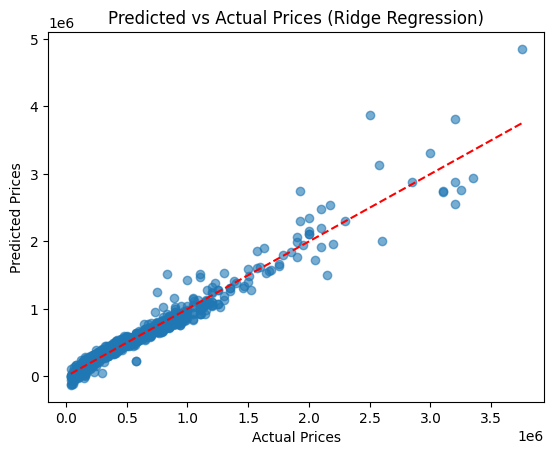

In [118]:
# Plot the predicted vs actual prices for your best-performing model.
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (Ridge Regression)")
plt.show()


In [128]:
# Use GridSearchCV to find the best alpha value for Ridge Regression.
param_grid = {'alpha': [0.01, 0.1, 1, 10, 50, 100, 200]}
ridge2 = Ridge(random_state=42)
grid_search = GridSearchCV(ridge2, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)


Best alpha: {'alpha': 10}
Best R^2 score: 0.9450653900372584


In [129]:
from sklearn.pipeline import Pipeline

#  Try Polynomial Regression on the dataset.
poly_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

poly_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [130]:
y_poly_pred = poly_pipeline.predict(X_test)

# Evaluate
print("Polynomial Regression R²:", r2_score(y_test, y_poly_pred))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_poly_pred))
print("Polynomial regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_poly_pred)))

Polynomial Regression R²: 0.984586725271208
Polynomial Regression MSE: 2797691996.908521
Polynomial regression RMSE:  52893.21314600316


In [122]:
# Summarize your findings:

## Summary Findings
1. Which Model Performed Best?

  - Polynomial Regression appears to be the best in terms of R², showing it can capture the nonlinear relationships in the dataset much better than Linear, Lasso or Ridge.

  - However, the high RMSE suggests it may be overfitting or that the target values are very large in magnitude, which inflates error values.

2. Why Polynomial Regression Did Better

  - Linear, Lasso, and Ridge only capture straight-line relationships
  - Polynomial regression can model curvature in the data, which matches the dataset’s underlying patterns more closely, hence the very high R².

3. Impovements:
- Scale Features: Polynomial features can create large values, making scaling (StandardScaler) important for stable coefficients.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6906 non-null   object 
 1   year           6906 non-null   int64  
 2   selling_price  6906 non-null   int64  
 3   km_driven      6906 non-null   int64  
 4   fuel           6906 non-null   object 
 5   seller_type    6906 non-null   object 
 6   transmission   6906 non-null   object 
 7   owner          6906 non-null   object 
 8   mileage        6906 non-null   float64
 9   engine         6906 non-null   float64
 10  max_power      6906 non-null   float64
 11  seats          6906 non-null   Int64  
 12  car_age        6906 non-null   int64  
 13  price_per_km   6906 non-null   float64
 14  brand          6906 non-null   object 
dtypes: Int64(1), float64(4), int64(4), object(6)
memory usage: 816.2+ KB


In [124]:
# Sample input as a single-row DataFrame
sample_input = pd.DataFrame([{
    "year": 2018,
    "km_driven": 50000,
    "fuel": "Petrol",
    "seller_type": "Individual",
    "transmission": "Manual",
    "owner": "First Owner",
    "mileage": 19.5,
    "engine": 1197,
    "max_power": 82,
    "seats": 5,
    "car_age": 7,
    "price_per_km": 2.5,
    "brand": "Maruti"
}])

# Apply get_dummies(to match training)
sample_encoded = pd.get_dummies(
    sample_input,
    columns=['fuel', 'seller_type', 'transmission', 'owner', 'brand'],
    drop_first=True
).astype(int)

sample_encoded = sample_encoded.reindex(columns=X_train.columns, fill_value=0)
sample_scaled = scaler.fit_transform(sample_encoded)
sample_encoded

,year,km_driven,mileage,engine,max_power,seats,car_age,price_per_km,fuel_Diesel,fuel_LPG,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2018,50000,19,1197,82,5,7,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# Predict using all models
linear_pred = linear_reg.predict(sample_encoded)[0]
lasso_pred = lasso.predict(sample_scaled)[0]
ridge_pred = ridge.predict(sample_encoded)[0] 
poly_pred = poly_pipeline.predict(sample_encoded)[0]

print(f"Linear Regression Prediction: {linear_pred}")
print(f"Lasso Prediction: {lasso_pred}")
print(f"Ridge Prediction: {ridge_pred}")
print(f"Polynomial Regression Prediction: {poly_pred}")


Linear Regression Prediction: 276587.14028116316
Lasso Prediction: 499499.6051774065
Ridge Prediction: 239526.41639810055
Polynomial Regression Prediction: 151527.01017923036


In [98]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return r2, rmse

# For lasso, use scaled X_test
lasso_r2, lasso_rmse = evaluate(lasso, X_test_scaled, y_test)

# For linear, ridge, poly, use unscaled X_test
linear_r2, linear_rmse = evaluate(linear_reg, X_test, y_test)
ridge_r2, ridge_rmse = evaluate(ridge, X_test, y_test)
poly_r2, poly_rmse = evaluate(poly_pipeline, X_test, y_test)

print(f"Linear R²: {linear_r2:.4f}, RMSE: {linear_rmse:.2f}")
print(f"Lasso R²: {lasso_r2:.4f}, RMSE: {lasso_rmse:.2f}")
print(f"Ridge R²: {ridge_r2:.4f}, RMSE: {ridge_rmse:.2f}")
print(f"Poly R²: {poly_r2:.4f}, RMSE: {poly_rmse:.2f}")

Linear R²: 0.9458, RMSE: 99169.27
Lasso R²: 0.9458, RMSE: 99165.51
Ridge R²: 0.9463, RMSE: 98695.58
Poly R²: 0.9846, RMSE: 52893.21


In [93]:
df.shape

(6906, 15)

In [132]:
# Save the pipeline for best model(polynomial)
joblib.dump(poly_pipeline, "car_price_predictor.pkl")
print("Successfully saved the full pipeline")

Successfully saved the full pipeline


In [133]:
# load pipeline
loaded_pipeline = joblib.load("car_price_predictor.pkl")
prediction = loaded_pipeline.predict(sample_encoded)
print(prediction)

[151527.01017923]


In [99]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 1.2 MB/s  0:00:08 1.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 352.7 kB/s  0:00:01253.9 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 955.2 kB/s  0:00:07 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 862.4 kB/s  0:00:44 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28/28 [streamlit];237m━ 27/28 [streamlit]]malizer]
